# Haberman Dataset

* The dataset contains patient cases who had undergone surgery for breast cancer.
* Study conducted at the University of Chicago's Billings Hospital on the survival of patients.
* Study conducted in between 1958 and 1970.

Stats of this Dataset:-
* Number of points:- 306
* Number of Features:- 4
* Zero Null values



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
haber = pd.read_csv("haberman.csv")
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Here in this dataset there are 2 classes. 
* 1 means patient survived 5 years or longer after the operation.
* 2 means patient survived less than 5 years after the operation.

In [3]:
print(haber.shape)

(306, 4)


In [4]:
haber["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

From the above observation we can say that there are about "225" persons who survived for more than 5 years and about "81" members who survived less than 5 years after the operation.

# Statistical Analysis of Data set

In [5]:
print(haber.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


# Univariate Analysis

Here I am providing this analysis to describe, summarize and find patterns in the single feature.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points lie within that group.
*  Here the height of the bar denotes the percentage of data points under the corresponding group.

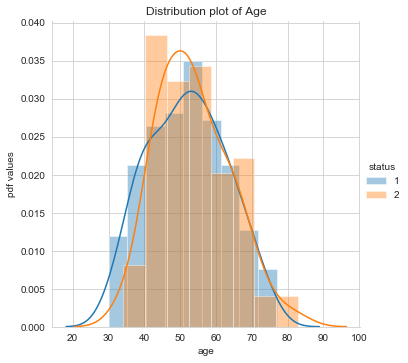

In [21]:
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel("pdf values")
plt.title("Distribution plot of Age")
plt.show();

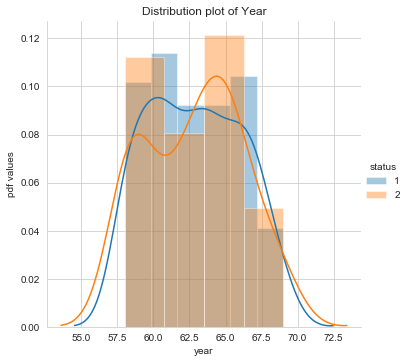

In [22]:
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel("pdf values")
plt.title("Distribution plot of Year")
plt.show();

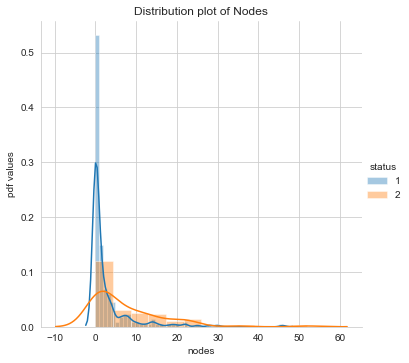

In [23]:
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel("pdf values")
plt.title("Distribution plot of Nodes")
plt.show();

Observation:-
* The number of positive lymph nodes of the survivors is highly dense from 0 to 5.

# CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


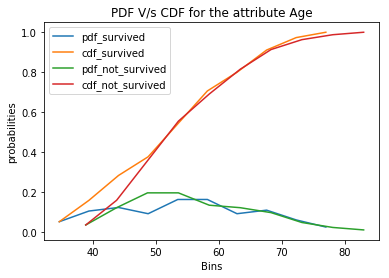

In [14]:
haber_survived = haber.loc[haber["status"] == 1];
haber_notsurvived = haber.loc[haber["status"] == 2];

counts, bin_edges = np.histogram(haber_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'pdf_survived')
plt.plot(bin_edges[1:], cdf, label = 'cdf_survived')


counts, bin_edges = np.histogram(haber_notsurvived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf_not_survived')
plt.plot(bin_edges[1:], cdf, label = 'cdf_not_survived')
plt.legend(loc = 'upper left')
plt.xlabel("Bins")
plt.ylabel("probabilities")
plt.title("PDF V/s CDF for the attribute Age")
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


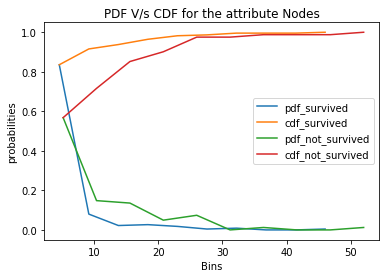

In [17]:
counts, bin_edges = np.histogram(haber_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf_survived')
plt.plot(bin_edges[1:], cdf,label = 'cdf_survived')


counts, bin_edges = np.histogram(haber_notsurvived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf_not_survived')
plt.plot(bin_edges[1:], cdf,label = 'cdf_not_survived')
plt.legend(loc = 'center right')
plt.xlabel("Bins")
plt.ylabel("probabilities")
plt.title("PDF V/s CDF for the attribute Nodes")
plt.show();

Observations:-
* When I compared both age cdf plot and nodes cdf plot, I came to know that using nodes is more useful to distinguish the data rather than using age column. 
* Almost 80% of the patients have less than or equal to 5 positive lymph nodes.

# 2-D Scatter Plot

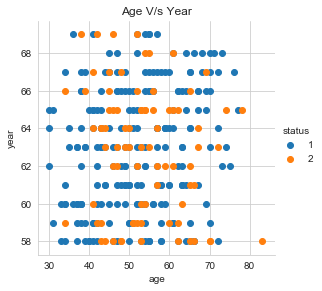

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("Age V/s Year")
plt.show();

From the above graph we can get to know that in the years 68,61,59 there are very low cases which are failures.

For still clear view lets use pair plots. These pair plots will give different plots by considering 2 columns at a time.

# Box Plot
* Box plot takes a less space and visually represents the five number summary of the data points in a box. 

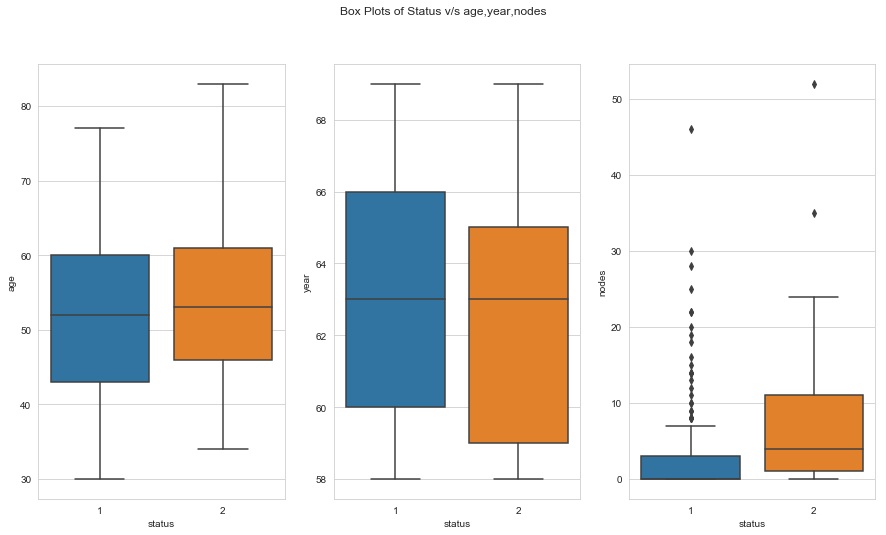

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
for idx, feature in enumerate(list(haber.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=haber, ax=axes[idx])
plt.suptitle("Box Plots of Status v/s age,year,nodes")
plt.show()

# Violin Plots
* Violin plot is the combination of box plot and probability density function.

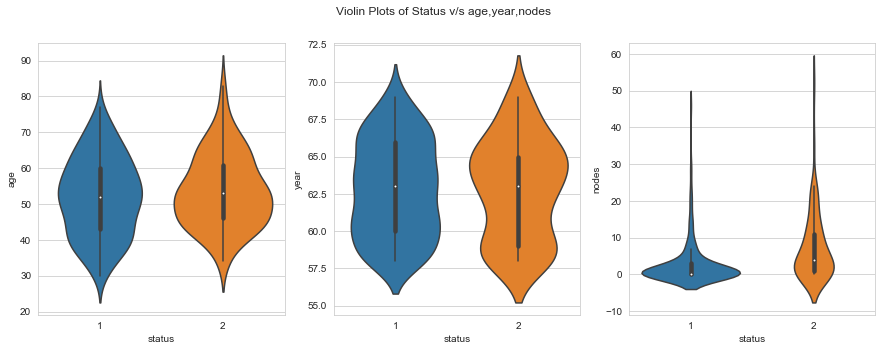

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haber.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=haber, ax=axes[idx])
plt.suptitle("Violin Plots of Status v/s age,year,nodes")
plt.show()

Observation from both Box and Violin plot:-
* The patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest. 

# Multivariate Analysis ( Pair Plots )

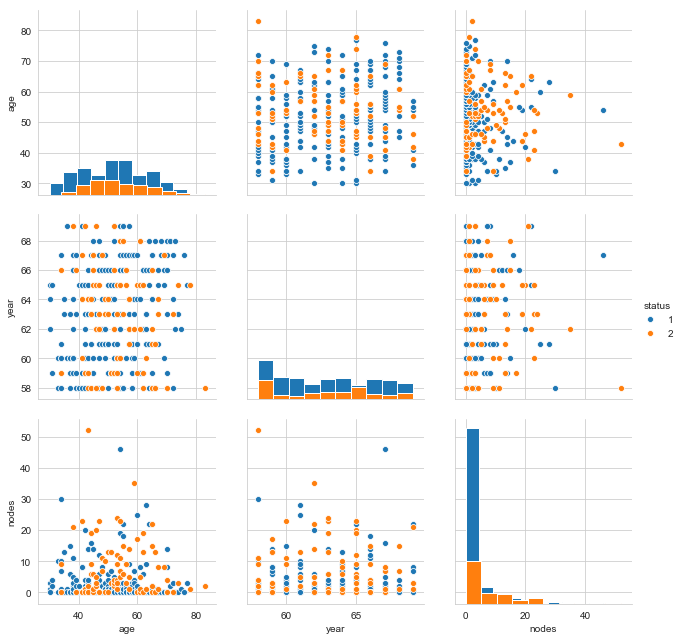

In [15]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status", height=3,vars =["age","year","nodes"], diag_kind ="hist");
plt.show()

Observation:-
* From the above graphs after scattering points we can say that year and nodes graph is giving better seperation between two classes than any other graphs.